## Stack Overflow Developer Survey 2020 EDA

##### The Dataset used for this project is from
https://insights.stackoverflow.com/survey?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-coursesedxorg-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01



##### The Public 2020 Stack Overflow Developer Survey Results - is made available under the Open Database License (ODbL): 
 http://opendatacommons.org/licenses/odbl/1.0/


#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import itertools

#### Creating a dataframe

In [2]:
survey=pd.read_csv("survey_results_public.csv")

#### Exploring the dataset

In [5]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

##### No.of rows and columns

In [8]:
print("This dataset has {a} rows and {b} columns ".format(a=survey.shape[0],b=survey.shape[1]))

This dataset has 64461 rows and 61 columns 


##### Mean age of survey participants

In [11]:
mean_age=round(survey['Age'].mean(),1)
print("The mean age of survey participants: {}".format(mean_age))

The mean age of survey participants: 30.8


##### Unique Countries in the dataset

In [12]:
survey['Country'].unique()

array(['Germany', 'United Kingdom', 'Russian Federation', 'Albania',
       'United States', 'India', 'Tunisia', 'Spain', 'Netherlands',
       'France', 'Belgium', 'Portugal', 'Canada', 'China', 'Ukraine',
       'Italy', 'Brazil', 'Austria', 'Mexico', 'Sweden', 'Poland',
       'Indonesia', 'Greece', 'Israel', 'Czech Republic',
       'Bosnia and Herzegovina', 'Bulgaria', 'Serbia', 'Switzerland',
       'Hungary', 'Nepal', 'Slovenia', 'Uruguay', 'Denmark', 'Pakistan',
       'Taiwan', 'Romania', 'Finland', 'Costa Rica', 'Nigeria', 'Chile',
       'Turkey', 'Panama', 'Ireland', 'Estonia', 'Philippines',
       'Australia', 'Nomadic', 'Peru', 'Cyprus', 'Sri Lanka', 'Kenya',
       'Norway', 'Kyrgyzstan', 'Iran', 'Croatia', 'Egypt', 'Argentina',
       'Ghana', 'Latvia', 'Morocco', 'Bangladesh', 'Ecuador', 'Haiti',
       'Venezuela, Bolivarian Republic of...', 'Colombia', 'Lithuania',
       'El Salvador', 'Honduras', 'Ethiopia', 'Lebanon', 'Uganda',
       'Algeria', 'Viet Nam', 'Guat

##### No.of participants -Top5 countries

In [18]:
survey['Country'].value_counts().head(5)

United States     12469
India              8403
United Kingdom     3896
Germany            3890
Canada             2191
Name: Country, dtype: int64

##### Finding Duplicates

In [20]:
survey['Respondent'].duplicated().value_counts()

False    64461
Name: Respondent, dtype: int64

###### This data set does not contain duplicate records

##### Missing values for all columns

In [25]:
survey.isnull().sum().sort_values(ascending=False)

ConvertedComp             29705
CompTotal                 29635
NEWPurchaseResearch       27140
PurchaseWhat              25097
WebframeDesireNextYear    24437
                          ...  
Employment                  607
Country                     389
MainBranch                  299
Hobbyist                     45
Respondent                    0
Length: 61, dtype: int64

In [3]:
pd.set_option('display.max_rows', 25) # setting to display maximum rows

In [50]:
round(((survey.isnull().sum().sort_values(ascending=False)/len(survey))*100),1)

ConvertedComp             46.1
CompTotal                 46.0
NEWPurchaseResearch       42.1
PurchaseWhat              38.9
WebframeDesireNextYear    37.9
                          ... 
Employment                 0.9
Country                    0.6
MainBranch                 0.5
Hobbyist                   0.1
Respondent                 0.0
Length: 61, dtype: float64

##### Respondents by Gender

In [29]:
survey['Gender'].value_counts()

Man                                                            46013
Woman                                                           3844
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         76
Woman;Man;Non-binary, genderqueer, or gender non-conforming       26
Name: Gender, dtype: int64

##### Median Age of Respondents

In [38]:
survey_G=survey[(survey['Gender']=='Man')| (survey['Gender']=='Woman')]

# Filtering the dataset for the Gender 'Man','Woman'

In [39]:
survey_G.groupby('Gender').median()['Age']

# Grouping the dataset by gender to find the median age 

Gender
Man      29.0
Woman    28.0
Name: Age, dtype: float64

##### Five number summary for Age column

In [47]:
survey['Age'].describe()[3:]

min      1.0
25%     24.0
50%     29.0
75%     35.0
max    279.0
Name: Age, dtype: float64

##### Histogram for Age

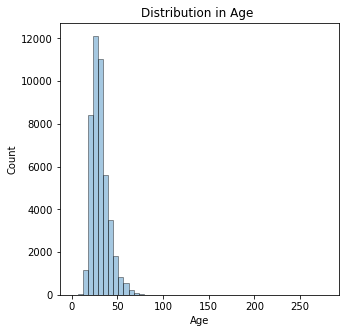

In [70]:
plt.figure(figsize=(5,5))
sns.distplot(survey['Age'],kde=False,hist_kws={"edgecolor":"black"})
plt.title("Distribution in Age ")
plt.ylabel("Count")
plt.show()


##### Distribution of Annual Salaries of Respondents (Convertedcomp)

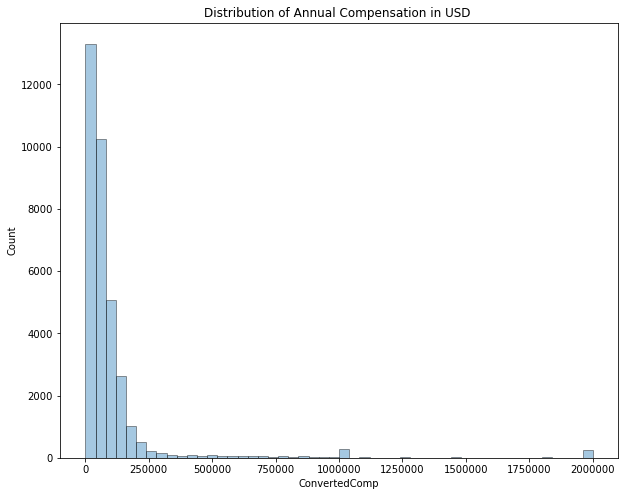

In [72]:
plt.figure(figsize=(10,8))
sns.distplot(survey['ConvertedComp'],kde=False,hist_kws={"edgecolor":"black"})
plt.title("Distribution of Annual Compensation in USD ")
plt.ylabel("Count")
plt.ticklabel_format(style="plain")
plt.show()


##### Box Plot for Annual Compensation

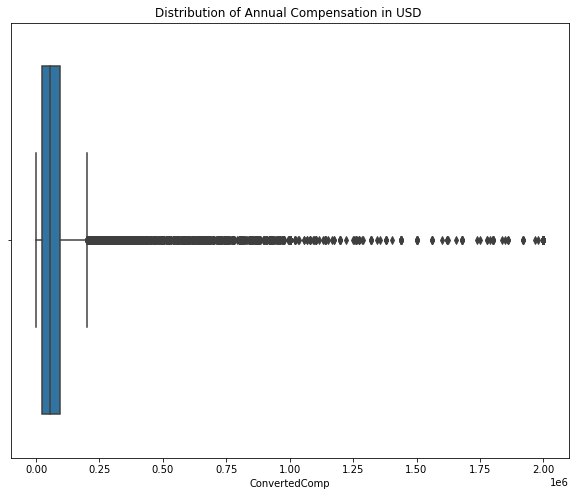

In [76]:
plt.figure(figsize=(10,8))
sns.boxplot(x=survey['ConvertedComp'])
plt.title("Distribution of Annual Compensation in USD ")
plt.show()

##### IQR for Annual Compensation

In [78]:
q1,q3=np.nanpercentile(survey['ConvertedComp'],[25,75])
iqr=q3-q1
print("IQR for Annual Compensation in USD is : {}".format(iqr))

IQR for Annual Compensation in USD is : 70352.0


##### Finding Upper and Lower Bounds

In [79]:
upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)
print("Lower Bound: {}".format(lower_bound))
print("Upper Bound: {}".format(upper_bound))

Lower Bound: -80880.0
Upper Bound: 200528.0


##### Identifying How Many Outliers are in ConvertedComp Column

In [83]:
(survey['ConvertedComp']>upper_bound).sum()

2301

##### Create a new data frame removing the outliers

In [86]:
survey_new=survey[survey['ConvertedComp']<upper_bound]

In [87]:
survey_new.shape

(32455, 61)

##### Correlation of Age With Other Numerical Columns

In [89]:
survey_new.corr()['Age']

Respondent       0.001081
Age              1.000000
CompTotal       -0.005904
ConvertedComp    0.378911
WorkWeekHrs      0.041160
Name: Age, dtype: float64

##### Scatter plot of Age and WorkWeekHrs

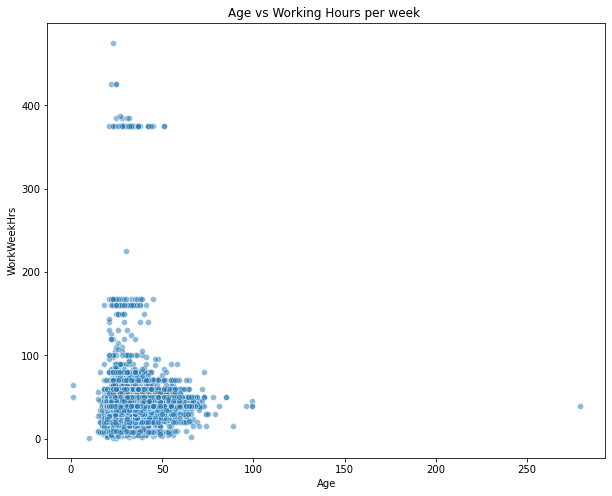

In [91]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=survey_new,x='Age',y='WorkWeekHrs',alpha=0.5)
plt.title("Age vs Working Hours per week ")
plt.show()

In [101]:
survey_new['MainBranch'].unique()

array(['I am a developer by profession',
       'I am not primarily a developer, but I write code sometimes as part of my work'],
      dtype=object)

##### Top 5 Languages that Respondents worked with last year

In [55]:
survey['LanguageWorkedWith']=survey['LanguageWorkedWith'].astype('string')

In [56]:
lanw=survey[survey['LanguageWorkedWith'].notnull()]

In [57]:
l1=collections.Counter(itertools.chain.from_iterable(v.split(';')for v in lanw['LanguageWorkedWith']  ))

In [58]:
l2 = pd.DataFrame.from_dict(l1, orient='index').reset_index()

In [59]:
l2.columns=['language','count']

##### Top 5 Languages

In [60]:
l2.sort_values(by=['count'],ascending=False).head(5)

,language,count
2,JavaScript,38822
1,HTML/CSS,36181
7,SQL,31413
5,Python,25287
8,Java,23074


##### Top 5 Languages that Respondents Desire to Work With Next Year

In [72]:
survey['LanguageDesireNextYear']=survey['LanguageDesireNextYear'].astype('string')

In [73]:
land=survey[survey['LanguageDesireNextYear'].notnull()]

In [74]:
ld=collections.Counter(itertools.chain.from_iterable(v.split(';')for v in land['LanguageDesireNextYear']  ))

In [75]:
ld1 = pd.DataFrame.from_dict(ld, orient='index').reset_index()

In [76]:
ld1.columns=['language','count']

##### Top 5 Languages to work with in future

In [77]:
ld1.sort_values(by=['count'],ascending=False).head(5)

,language,count
3,Python,26682
2,JavaScript,26188
1,HTML/CSS,20771
12,SQL,19970
14,TypeScript,17150


##### Top 5 Databases that Respondents worked with last year

In [78]:
survey['DatabaseWorkedWith']=survey['DatabaseWorkedWith'].astype('string')

In [79]:
dt=survey[survey['DatabaseWorkedWith'].notnull()]

In [81]:
database_counter=collections.Counter(itertools.chain.from_iterable(v.split(';')for v in dt['DatabaseWorkedWith']  ))

In [82]:
database_df = pd.DataFrame.from_dict(database_counter, orient='index').reset_index()

In [83]:
database_df.columns=['DatabaseWorkedWith','count']

##### Top 5 Databases

In [84]:
database_df.sort_values(by=['count'],ascending=False).head(5)

,DatabaseWorkedWith,count
3,MySQL,27559
4,PostgreSQL,17892
1,Microsoft SQL Server,16336
6,SQLite,15434
9,MongoDB,13086


##### Top 5 Databases that Respondents  Desire to Work with Next Year

In [99]:
survey['DatabaseDesireNextYear']=survey['DatabaseDesireNextYear'].astype('string')

In [100]:
dt_d=survey[survey['DatabaseDesireNextYear'].notnull()]

In [101]:
databased_counter=collections.Counter(itertools.chain.from_iterable(v.split(';')for v in dt_d['DatabaseDesireNextYear']  ))

In [102]:
databased_df = pd.DataFrame.from_dict(databased_counter, orient='index').reset_index()

In [103]:
databased_df.columns=['DatabaseDesireNextYear','count']

##### TOp 5 Databases to work with in future

In [105]:
databased_df.sort_values(by=['count'],ascending=False).head(5)

,DatabaseDesireNextYear,count
2,PostgreSQL,17681
3,MongoDB,16024
1,MySQL,15734
8,Redis,11977
9,SQLite,10909
